# Fake News Prediction using LogisticRegression 


# Work Flow
1. Download and load the data set
2. Data pre processing
3. Data Analysis
4. Model
5. Train the model
6. Evaluate the model
7. Build predecitive system

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## About the data
### The data has
1. unique id
2. Title of the news
3. Author of the article
4. Text of news
5. Label (Target)

           1: Fake
           0: Real

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Loading the data and showcasing the output of the data

In [ ]:
data_news=pd.read_csv('/content/train.csv')
data_news.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Data preprocessing


In [ ]:
data_news.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [ ]:
data_news.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

It has missing values in **Title, Author and text** let's do changes to remove or replace the null values.

Here we are going to replace the null values with null string because since we have large dataset it's not necessary to replace these much null values, replacing null values can be done when we have smaller data set and large amount of null values using **Imputational method**

In [ ]:
news_data_null=data_news.fillna('')
news_data_null.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
news_data_null['values'] = news_data_null['title'] +" " +news_data_null['author']
news_data_null['values']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You Fired Consortiumne...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799              What Keeps the F-35 Alive David Swanson
Name: values, Length: 20800, dtype: object

## **Stemming : reduces the word to its root word**


In [ ]:
porter_stemmer=PorterStemmer()

In [ ]:
def stemming(values):
    stemming_values = re.sub('[^a-zA-Z]',' ',values)
    stemming_values = stemming_values.lower()
    stemming_values = stemming_values.split()
    stemming_values = [porter_stemmer.stem(word) for word in stemming_values if not word in stopwords.words('english')]
    stemming_values = ' '.join(stemming_values)
    return stemming_values

In above function what are the steps done: 
1. Excluding the numeric values and replacing the symbols with spaces
2. Converting all the values to lower letter word
3. And forming a list
4. now removing the stop words from the list ans stroing into a variable

In [ ]:
news_data_null['values']=news_data_null['values'].apply(stemming)

In [ ]:
print(news_data_null['values'])

0        hou dem aid even see comey letter jason chaffe...
1        flynn hillari clinton big woman campu breitbar...
2                   truth might get fire consortiumnew com
3        civilian kill singl us airstrik identifi jessi...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci jero...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exerci balkan alex a...
20799                            keep f aliv david swanson
Name: values, Length: 20800, dtype: object


In [ ]:
# removing the data and label
X=news_data_null['values'].values
Y=news_data_null['label'].values

In [ ]:
print(X,Y)

['hou dem aid even see comey letter jason chaffetz tweet darrel lucu'
 'flynn hillari clinton big woman campu breitbart daniel j flynn'
 'truth might get fire consortiumnew com' ...
 'maci said receiv takeov approach hudson bay new york time michael j de la merc rachel abram'
 'nato russia hold parallel exerci balkan alex ansari'
 'keep f aliv david swanson'] [1 0 1 ... 0 1 1]


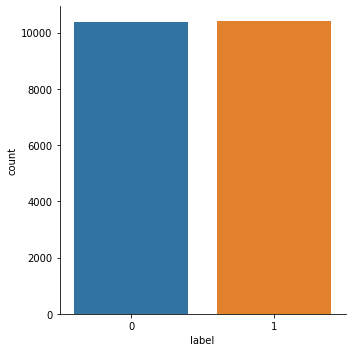

In [ ]:
sns.catplot(x="label",data=news_data_null,kind='count')

### Converting alphabaetical values to numerical values

In [ ]:
tfid_vectorizer=TfidfVectorizer()
X=tfid_vectorizer.fit_transform(X)

In [ ]:
print(X)

  (0, 8818)	0.3635963806326075
  (0, 3567)	0.3598939188262559
  (0, 15545)	0.28485063562728646
  (0, 2464)	0.3676519686797209
  (0, 7608)	0.24785219520671603
  (0, 8542)	0.29212514087043684
  (0, 2933)	0.2468450128533713
  (0, 13342)	0.2565896679337957
  (0, 4916)	0.233316966909351
  (0, 263)	0.27010124977708766
  (0, 3759)	0.2705332480845492
  (0, 6928)	0.21874169089359144
  (1, 3535)	0.2653147533915268
  (1, 1877)	0.15614790568229528
  (1, 2206)	0.36915639258038363
  (1, 16646)	0.3025156488372128
  (1, 1481)	0.2957471154505952
  (1, 2790)	0.19208753385709676
  (1, 6742)	0.19152496072048605
  (1, 5439)	0.7186013955384664
  (2, 2917)	0.3179886800654691
  (2, 3072)	0.46097489583229645
  (2, 5325)	0.3866530551182615
  (2, 5901)	0.3474613386728292
  (2, 9528)	0.49351492943649944
  :	:
  (20797, 1274)	0.3355398041847889
  (20797, 12992)	0.24837050368318928
  (20797, 12222)	0.2727640214571724
  (20797, 14831)	0.311742474262946
  (20797, 12017)	0.2479002225274413
  (20797, 9427)	0.2939494781

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(14560, 16974) (14560,) (6240, 16974) (6240,)


## Training the model

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

## Evaluating the model

In [ ]:
train_accuracy=model.predict(X_train)
train_accuracy_score=accuracy_score(train_accuracy,Y_train)
print("Accuracy score of train data : ",train_accuracy_score)


Accuracy score of train data :  0.9854395604395605


In [ ]:
test_accuracy=model.predict(X_test)
test_accuracy_score=accuracy_score(test_accuracy,Y_test)
print("Accuracy score of train data : ",test_accuracy_score)


Accuracy score of train data :  0.9729166666666667


## Building Predictive system

In [ ]:
X_input=X_test[2000]
prediction=model.predict(X_input)
print(prediction)
if prediction[0]==0:
  print("Real News")
else:
  print("Fake News")

[1]
Fake News


X_test[2000] represents the 2000th row


In [ ]:
print(Y_test[2000])

1
